In [2]:
#data manipulation
import numpy as np
import pandas as pd

#netowrk analysis
import networkx as nx

#plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#filter warnings for final presentation
import warnings
warnings.filterwarnings("ignore")

#notebook formatting
from IPython.core.display import display, HTML

In [38]:
# read csv file
raw_asset_prices_df = pd.read_csv("pythonData.csv")

# get number of rows and columns of the dataset
df_shape = (raw_asset_prices_df.shape)
print(f"There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset")
print(f"Data timeperiod covers: {min(raw_asset_prices_df.index)} to {max(raw_asset_prices_df.index)}")

# show first five rows
raw_asset_prices_df.head()

There are 377 rows and 58 columns in the dataset
Data timeperiod covers: 0 to 376


,ARS/USD,AUD/USD,ATS/USD,BEF/USD,BRL/USD,GBP/USD,BGN/USD,CAD/USD,CLP/USD,CNY/USD,...,SIT/USD,ZAR/USD,KRW/USD,ESP/USD,XDR/USD,SEK/USD,CHF/USD,TWD/USD,THB/USD,TRY/USD
0,59.732,1.4286,12.282,36.006,4.0219,0.76181,1.7469,1.3059,746.73,6.9872,...,213.89,14.087,1156.7,148.51,0.72282,9.3279,0.96898,30.062,29.938,5.9440
1,59.408,1.4238,12.255,35.928,4.0198,0.75626,1.7401,1.2988,742.67,6.9641,...,213.43,14.009,1154.5,148.19,0.72148,9.3171,0.96659,29.919,29.775,5.9496
2,59.797,1.4310,12.312,36.095,4.0273,0.76043,1.7465,1.2992,750.22,6.9625,...,214.42,14.096,1159.0,148.88,0.72281,9.3602,0.97144,30.019,30.130,5.9569
3,59.833,1.4375,12.328,36.141,4.0486,0.76432,1.7554,1.2988,757.08,6.9678,...,214.70,14.277,1165.9,149.07,0.72320,9.3980,0.97179,30.044,30.169,5.9742
4,59.648,1.4418,12.296,36.046,4.0582,0.76008,1.7464,1.2970,772.36,6.9769,...,214.13,14.229,1168.5,148.68,0.72248,9.4122,0.96907,30.072,30.132,5.9715


In [41]:
# create empty dataframe for log returns information
log_returns_df = pd.DataFrame()

# calculate log returns of each asset
# loop through each column in dataframe and and calculate the daily log returns 
# add log returns column to new a dataframe
for col in raw_asset_prices_df.columns:
    # dates are given in reverse order so need to set diff to -1.
    log_returns_df[col] = np.log(raw_asset_prices_df[col]).diff(1)

log_returns_df = log_returns_df.iloc[1: , :]
log_returns_df.columns = log_returns_df.columns.str.replace('/USD', '')

#check output of log returns dataframe
log_returns_df.head()

,ARS,AUD,ATS,BEF,BRL,GBP,BGN,CAD,CLP,CNY,...,SIT,ZAR,KRW,ESP,XDR,SEK,CHF,TWD,THB,TRY
1,-0.005439,-0.003366,-0.002201,-0.002169,-0.000522,-0.007312,-0.003900,-0.005452,-0.005452,-0.003312,...,-0.002153,-0.005552,-0.001904,-0.002157,-0.001856,-0.001158,-0.002470,-0.004768,-0.005459,0.000942
2,0.006527,0.005044,0.004640,0.004637,0.001864,0.005499,0.003671,0.000308,0.010115,-0.000230,...,0.004628,0.006191,0.003890,0.004645,0.001842,0.004615,0.005005,0.003337,0.011852,0.001226
3,0.000602,0.004532,0.001299,0.001274,0.005275,0.005102,0.005083,-0.000308,0.009102,0.000761,...,0.001305,0.012759,0.005936,0.001275,0.000539,0.004030,0.000360,0.000832,0.001294,0.002900
4,-0.003097,0.002987,-0.002599,-0.002632,0.002368,-0.005563,-0.005140,-0.001387,0.019982,0.001305,...,-0.002658,-0.003368,0.002228,-0.002620,-0.000996,0.001510,-0.002803,0.000932,-0.001227,-0.000452
5,0.002562,0.009869,0.003896,0.003904,0.004573,0.002654,0.003373,0.003002,-0.005244,-0.004511,...,0.003915,0.004977,-0.000599,0.003893,0.001134,0.003722,0.002257,-0.000699,0.005659,0.000234


In [42]:
#calculate correlation matrix using inbuilt pandas function
correlation_matrix = log_returns_df.corr()

#show first five rows of the correlation matrix 
correlation_matrix.head()




,ARS,AUD,ATS,BEF,BRL,GBP,BGN,CAD,CLP,CNY,...,SIT,ZAR,KRW,ESP,XDR,SEK,CHF,TWD,THB,TRY
ARS,1.000000,-0.124820,0.022055,0.021801,0.020894,-0.066735,-0.109365,-0.142517,-0.044246,-0.151372,...,0.022064,-0.035086,-0.148366,0.021245,-0.019497,-0.017604,0.101288,-0.035471,-0.124374,-0.032427
AUD,-0.124820,1.000000,0.621052,0.621214,0.408972,0.712857,0.579087,0.764388,0.415569,0.436003,...,0.620893,0.561024,0.658075,0.621307,0.691441,0.736135,0.468905,0.395330,0.485628,0.268385
ATS,0.022055,0.621052,1.000000,0.999961,0.259643,0.564354,0.780295,0.486855,0.212785,0.423589,...,0.999953,0.323380,0.390409,0.999949,0.949960,0.804808,0.851810,0.306380,0.290433,0.168038
BEF,0.021801,0.621214,0.999961,1.000000,0.259422,0.564280,0.779871,0.486992,0.212589,0.424422,...,0.999985,0.323697,0.390510,0.999974,0.950094,0.804701,0.852097,0.306002,0.290734,0.167987
BRL,0.020894,0.408972,0.259643,0.259422,1.000000,0.312696,0.204543,0.444152,0.477079,0.251121,...,0.259415,0.593025,0.433729,0.259735,0.265700,0.357613,0.116724,0.229992,0.250495,0.253858


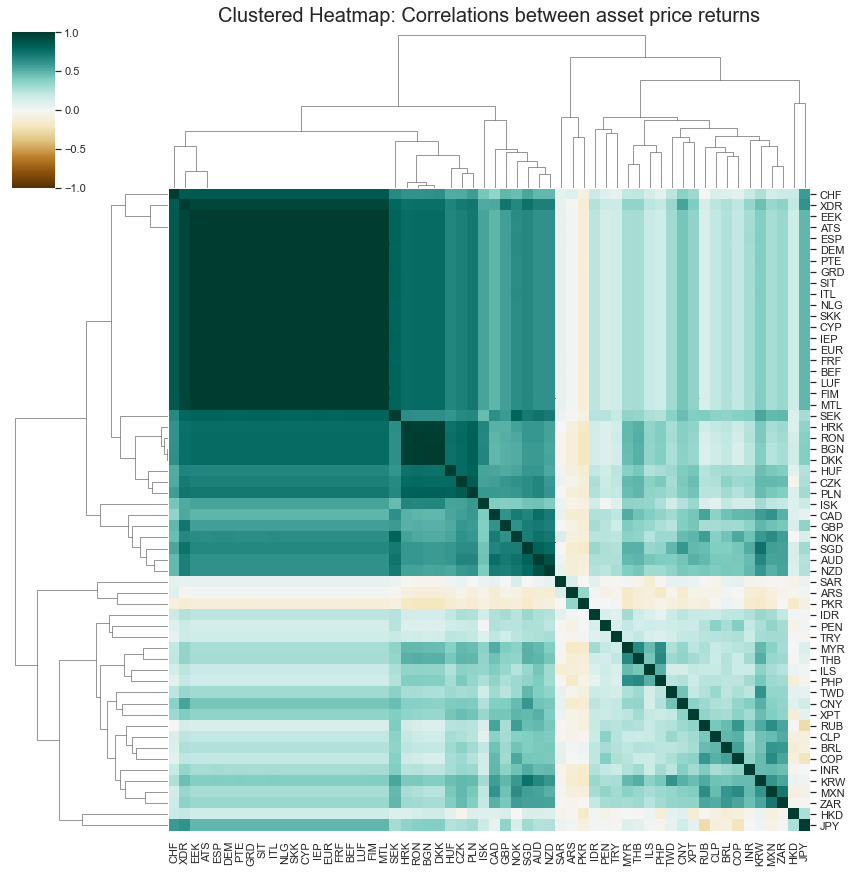

<Figure size 648x648 with 0 Axes>

In [46]:
#visualise correlation matrix using a clustered heatmap
g = sns.clustermap(correlation_matrix, cmap="BrBG",  yticklabels=True, xticklabels=True, figsize=(12, 12), vmin=-1, vmax=1)
# g.fig.suptitle("Clustered Heatmap: Correlations between asset price returns")
# g.fig.subplots_adjust(top=.95)
g.ax_col_dendrogram.set_title("Clustered Heatmap: Correlations between asset price returns")
g.ax_col_dendrogram.title.set_fontsize(20)
plt.show()
plt.savefig("clustered_heatmap.png")
